# Review of classical electronic structure methods 

In order to assess the performance of quantum computing algorithms in addressing the electronic structure problem, we will briefly review a few commonly employed classical electronic structure methods of varying level of approximation. 

## Hartree-Fock

The Hartree-Fock (HF) method employs a **mean-field approximation**, where Coulomb correlation of electrons is neglected. The HF wavefunction is hence restricted to the form of a single Slater determinant, for which the optimal form may be acquired by an optimization of the underlying single particle basis (orbitals). Once the optimal HF orbitals have been found, the HF state may be written as 

$$ | \text{HF} \rangle = \prod_{p \in \text{occ}} \hat a^\dagger_p | \text{vac} \rangle $$

where $\hat a^\dagger_p$ creates an electron in the $p^{\rm{th}}$ optimized HF spin orbital, and  $| \text{vac} \rangle$ is the vacuum state (all spin-orbitals unoccupied). Due to the restriction to a single Slater determinant, the HF energy may be obtained very efficiently and can be applied to very large molecules, however it becomes qualitatively incorrect when **electronic correlations** become sufficiently strong. The HF wavefunction is often used as a starting point in more accurate treatments of electronic correlation. 

## Coupled cluster

The Coupled cluster (CC) method introduces electronic correlation to the wavefunction ansatz by operating on the HF reference state with the exponential of excitation operators

$$|\text{CC} \rangle = e^{\hat T} | \text{HF}\rangle, \quad \hat T = \hat T_1 + \hat T_2 + ...$$

where $\hat T_1 = \sum_{ia} t^{a}_i \hat a^\dagger_a \hat a_i$ are referred to as 'singles', $\hat T_2 = \sum_{ijab} t^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j$ as 'doubles', etc. When the excitation rank is truncated to only singles (S) and doubles (D), $\hat T = \hat T_1 + \hat T_2$, the corresponding ansatz is referred to as CCSD. Since the number of possible single and double excitations for a system of $N$ electrons in $M$ orbitals is polynomial in $M$, one can efficiently solve a system of equations to obtain the optimized CCSD amplitudes. CCSD often gives accurate energies and can be applied to modestly sized chemical systems. However, due to its implementation, it can **violate the variational principle** and give energies lower than the ground state.

## Full Configuration Interaction
The full configuration interaction (FCI) method yields the **exact ground state energy** within a given basis set. The FCI wavefunction is written as a linear combination of all possible $N$-particle Slater determinants over the orbital basis
$$|\text{FCI} \rangle =  \left( \sum_{ia} C^{a}_i \hat a^\dagger_a \hat a_i + \sum_{ijab} C^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j + ...  \right) | \text{HF} \rangle $$
where the sum includes up to $N$-electron excitations, and hence there are an exponential number of coefficients to optimize in $| \text{FCI} \rangle$. Due to its **exponential complexity**, FCI is often reserved for only the smallest chemical systems. However, it serves as a useful result to compare to when assessing tractable electronic structure methods.

# Benchmarking for electronic PESs in minimal basis (STO-3G)

We will apply HF, CCSD, and FCI to obtaining the PESs for a few molecular dissociation processes in minimal (STO-3G) basis.

# Step 1

## Variational Methods

    * FCI
    * Hartree-Fock


## Non-Variational Methods
    * CCSD
    

In [1]:
#import numpy as np
import matplotlib.pyplot as plt
from utility import *

basis = 'sto-3g'

## H<sub>2</sub>

In [2]:
bond_lengths = np.linspace(0.2, 2.6, 30)

In [3]:
#Run FCI
FCI_PES = obtain_PES('h2', bond_lengths, basis, method='fci')

converged SCF energy = 0.164175012061695
E = 0.1574821347983626 Eh
converged SCF energy = -0.508594677337179
E = -0.5163121946776859 Eh
converged SCF energy = -0.824355057272618
E = -0.8334570885242663 Eh
converged SCF energy = -0.985164732061365
E = -0.9960263672833713 Eh
converged SCF energy = -1.06726979187071
E = -1.0802932743796436 Eh
converged SCF energy = -1.10529148342858
E = -1.1209145729966639 Eh
converged SCF energy = -1.1172462926436
E = -1.1359474009031043 Eh
converged SCF energy = -1.11346598424933
E = -1.1357724292652416 Eh
converged SCF energy = -1.10013463056233
E = -1.1266377898532054 Eh
converged SCF energy = -1.0809713662008
E = -1.1123449437380404 Eh
converged SCF energy = -1.05823160686547
E = -1.0952446198786667 Eh
converged SCF energy = -1.03334779953221
E = -1.0768652361764028 Eh
converged SCF energy = -1.00730506460738
E = -1.0582735294493202 Eh
converged SCF energy = -0.980830468645229
E = -1.0402498139503653 Eh
converged SCF energy = -0.954476954404638
E = -

In [4]:
#Run HF
HF_PES = obtain_PES('h2', bond_lengths, basis,  method='hf')

converged SCF energy = 0.164175012061695
E = 0.16417501206169494 Eh
converged SCF energy = -0.508594677337179
E = -0.508594677337179 Eh
converged SCF energy = -0.824355057272618
E = -0.8243550572726184 Eh
converged SCF energy = -0.985164732061365
E = -0.985164732061365 Eh
converged SCF energy = -1.06726979187071
E = -1.0672697918707073 Eh
converged SCF energy = -1.10529148342858
E = -1.105291483428584 Eh
converged SCF energy = -1.1172462926436
E = -1.1172462926436029 Eh
converged SCF energy = -1.11346598424933
E = -1.1134659842493346 Eh
converged SCF energy = -1.10013463056233
E = -1.1001346305623296 Eh
converged SCF energy = -1.0809713662008
E = -1.0809713662007994 Eh
converged SCF energy = -1.05823160686547
E = -1.0582316068654696 Eh
converged SCF energy = -1.03334779953221
E = -1.0333477995322082 Eh
converged SCF energy = -1.00730506460738
E = -1.0073050646073793 Eh
converged SCF energy = -0.980830468645229
E = -0.9808304686452292 Eh
converged SCF energy = -0.954476954404638
E = -0.

In [5]:
#Run CCSD
CCSD_PES = obtain_PES('h2', bond_lengths, basis,  method='ccsd')

converged SCF energy = 0.164175012061695
E = 0.15748213187554225 Eh
converged SCF energy = -0.508594677337179
E = -0.5163122005946617 Eh
converged SCF energy = -0.824355057272618
E = -0.8334571014926244 Eh
converged SCF energy = -0.985164732061365
E = -0.9960263962823768 Eh
converged SCF energy = -1.06726979187071
E = -1.080293312132263 Eh
converged SCF energy = -1.10529148342858
E = -1.1209146530869545 Eh
converged SCF energy = -1.1172462926436
E = -1.1359475159331265 Eh
converged SCF energy = -1.11346598424933
E = -1.1357726533802288 Eh
converged SCF energy = -1.10013463056233
E = -1.1266381122692135 Eh
converged SCF energy = -1.0809713662008
E = -1.112344943743415 Eh
converged SCF energy = -1.05823160686547
E = -1.0952446198960106 Eh
converged SCF energy = -1.03334779953221
E = -1.0768652362333517 Eh
converged SCF energy = -1.00730506460738
E = -1.0582735296247006 Eh
converged SCF energy = -0.980830468645229
E = -1.040249813976073 Eh
converged SCF energy = -0.954476954404638
E = -1.

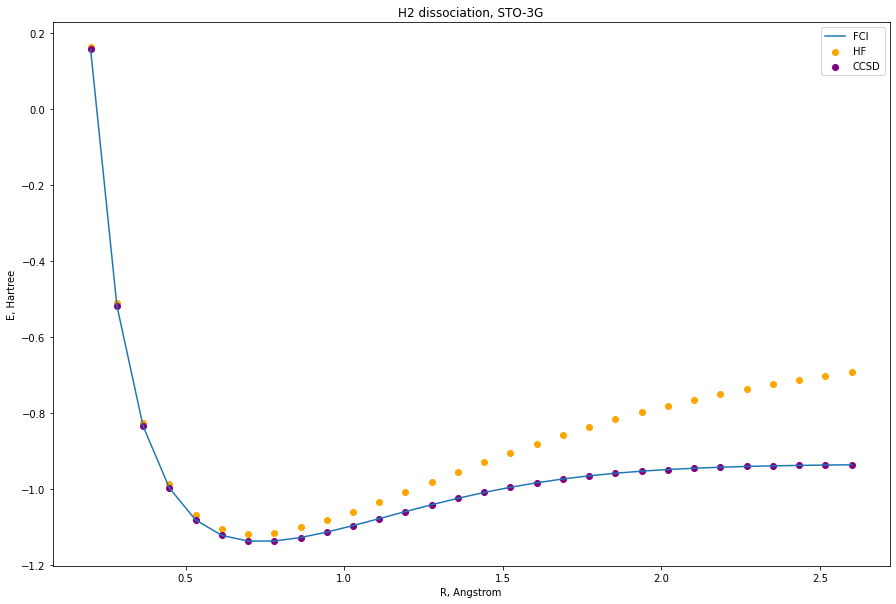

In [6]:
#Plot H2 PESs


plt.figure(figsize=(15,10))
plt.title('H2 dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

plt.show()


## H<sub>2</sub>O symmetric O-H dissociation

In [7]:
bond_lengths = np.linspace(0.5,2.7, 30)

In [8]:
#Run FCI
FCI_PES_H20 = obtain_PES('h2o', bond_lengths, basis, method='fci')

converged SCF energy = -73.1294523897688
E = -73.14278405666452 Eh
converged SCF energy = -73.950177882939
E = -73.96732492320682 Eh
converged SCF energy = -74.4282086017598
E = -74.44972726687385 Eh
converged SCF energy = -74.7032427195031
E = -74.72986845765735 Eh
converged SCF energy = -74.8556815782025
E = -74.88837974130847 Eh
converged SCF energy = -74.932442894888
E = -74.97242832765178 Eh
converged SCF energy = -74.9612856365187
E = -75.01002774196999 Eh
converged SCF energy = -74.9591792065216
E = -75.01838657766874 Eh
converged SCF energy = -74.9370114543683
E = -75.00859216158774 Eh
converged SCF energy = -74.902056998469
E = -74.98806132456731 Eh
converged SCF energy = -74.8592408328807
E = -74.96180144903816 Eh
converged SCF energy = -74.8118599354195
E = -74.93314362615418 Eh
converged SCF energy = -74.7620879995802
E = -74.90426241587976 Eh
converged SCF energy = -74.7113683197376
E = -74.87657335050046 Eh
converged SCF energy = -74.660706183946
E = -74.85101149921789 Eh

In [9]:
#Run HF
HF_PES_H20 = obtain_PES('h2o', bond_lengths, basis,  method='hf')

converged SCF energy = -73.1294523897689
E = -73.12945238976891 Eh
converged SCF energy = -73.950177882939
E = -73.9501778829389 Eh
converged SCF energy = -74.4282086017598
E = -74.42820860175976 Eh
converged SCF energy = -74.7032427195031
E = -74.70324271950304 Eh
converged SCF energy = -74.8556815782025
E = -74.85568157821015 Eh
converged SCF energy = -74.932442894888
E = -74.93244289488798 Eh
converged SCF energy = -74.9612856365187
E = -74.96128563651864 Eh
converged SCF energy = -74.9591792065217
E = -74.95917920652158 Eh
converged SCF energy = -74.9370114543682
E = -74.93701145436826 Eh
converged SCF energy = -74.9020569984689
E = -74.90205699846892 Eh
converged SCF energy = -74.8592408328807
E = -74.85924083288072 Eh
converged SCF energy = -74.8118599354194
E = -74.81185993541945 Eh
converged SCF energy = -74.7620879995803
E = -74.76208799958027 Eh
converged SCF energy = -74.7113683197376
E = -74.71136831973764 Eh
converged SCF energy = -74.660706183946
E = -74.66070618394599 Eh

In [10]:
#Run CCSD
CCSD_PES_H20 = obtain_PES('h2o', bond_lengths, basis,  method='ccsd')

converged SCF energy = -73.1294523897689
E = -73.14276521635898 Eh
converged SCF energy = -73.950177882939
E = -73.96729927707142 Eh
converged SCF energy = -74.4282086017598
E = -74.44969229202076 Eh
converged SCF energy = -74.703242719503
E = -74.72982040597256 Eh
converged SCF energy = -74.8556815782025
E = -74.88831391147554 Eh
converged SCF energy = -74.932442894888
E = -74.97233877008041 Eh
converged SCF energy = -74.9612856365187
E = -75.00990562362679 Eh
converged SCF energy = -74.9591792065216
E = -75.0182172319027 Eh
converged SCF energy = -74.9370114543682
E = -75.00835203749446 Eh
converged SCF energy = -74.9020569984689
E = -74.987717128713 Eh
converged SCF energy = -74.8592408328807
E = -74.96131407918143 Eh
converged SCF energy = -74.8118599354194
E = -74.93247994150119 Eh
converged SCF energy = -74.7620879995802
E = -74.90341835000912 Eh
converged SCF energy = -74.7113683197376
E = -74.87561466455877 Eh
converged SCF energy = -74.660706183946
E = -74.85013811087396 Eh
co

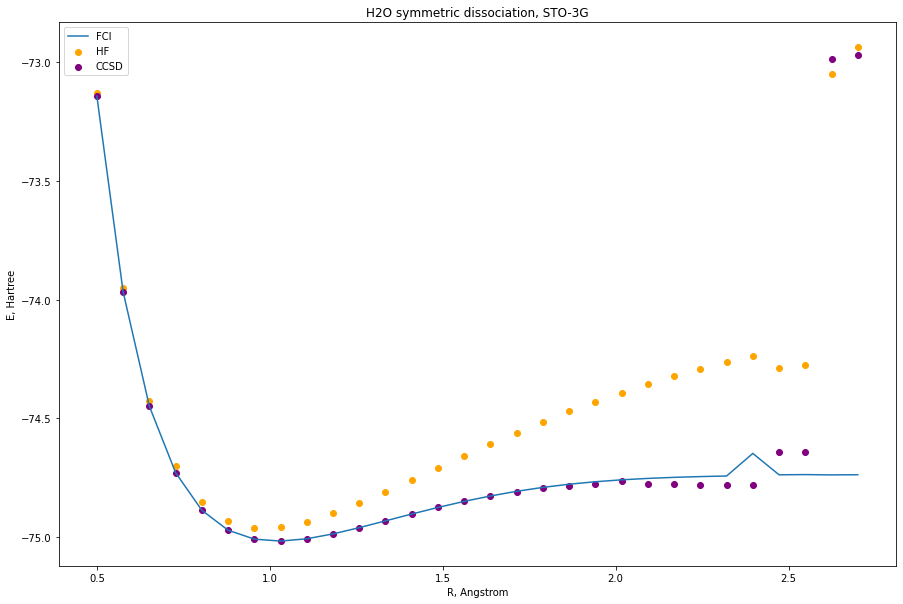

In [11]:
#Plot H2O PESs


plt.figure(figsize=(15,10))
plt.title('H2O symmetric dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES_H20, label='FCI')
plt.scatter(bond_lengths, HF_PES_H20, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES_H20, label='CCSD', color='purple')
plt.legend(loc=2)

plt.show()


<br>
<br>
<br>
<br>
<br>

<font size='6' style="color:#00A6D6">  <b>2. Optional</b> </font>

<br>
<br>
<br>

In [12]:
def obtain_PES_fragments(molecule, bond_lengths, fragments_distance, basis, method):

    if method.lower() not in ['ccsd', 'cisd', 'fci', 'hf']:
        raise(ValueError("Method not recognized, implemented methods are 'ccsd', 'cisd', 'fci', 'hf'."))

    gridpoints = len(bond_lengths)
    energies = np.zeros(gridpoints)
    

    for i in range(gridpoints):

        obtained_e = False
        nudged_geo_tries = 0

        while obtained_e == False:

            try:
                mol_data = [
                            ['H', [0, 0, 0]],
                            ['H', [0, 0, bond_lengths[i]]],
                            ['H', [0, fragments_distance, 0]],
                            ['H', [0, fragments_distance, bond_lengths[i]]]
                            ]

                mol_data = convert_mol_data_to_xyz_format(mol_data)
                mol_data = quantumchemistry.Molecule(mol_data, basis, backend="pyscf")

                if method == 'cisd':
                    result = mol_data.compute_energy('detci', options={"detci__ex_level": 2})
                else:
                    result = mol_data.compute_energy(method)

                print("E = {} Eh".format(result))

                energies[i] = result
                obtained_e = True

            except:
                #Nudge geometry, cross fingers
                bond_lengths[i] += 0.00000042
                nudged_geo_tries += 1

            if nudged_geo_tries > 9:
                obtained_e = True
                energies[i] = np.nan
                print("Could not converge")

    return energies

In [13]:

fragments_fci  = {0.5: [], 1: [], 1.5: [], 2: [], 2.5: []}
fragments_hf   = {0.5: [], 1: [], 1.5: [], 2: [], 2.5: []}
fragments_ccsd = {0.5: [], 1: [], 1.5: [], 2: [], 2.5: []}


In [14]:

for distance in fragments_fci.keys():
    fragments_fci[distance] = obtain_PES_fragments('h4', bond_lengths, distance, basis, method='fci')
    

converged SCF energy = -0.490349430194875
E = -0.6413358424214746 Eh
converged SCF energy = -0.892121370891234
E = -0.9352552199677513 Eh
converged SCF energy = -1.17022797966275
E = -1.2074071932556762 Eh
converged SCF energy = -1.38085394485477
E = -1.4155014704219981 Eh
converged SCF energy = -1.5413846732906
E = -1.5743959835218249 Eh
converged SCF energy = -1.66446290228054
E = -1.6962067496975708 Eh
converged SCF energy = -1.75935726226711
E = -1.7900382576777885 Eh
converged SCF energy = -1.83285632119339
E = -1.862617110043737 Eh
converged SCF energy = -1.8899487780261
E = -1.9189047389984633 Eh
converged SCF energy = -1.93434664099421
E = -1.9625985296025275 Eh
converged SCF energy = -1.9688632350553
E = -1.99650179969223 Eh
converged SCF energy = -1.99566848573665
E = -2.0227760474453 Eh
converged SCF energy = -2.01645559497973
E = -2.043106524835791 Eh
converged SCF energy = -2.03255195661922
E = -2.0588128449311074 Eh
converged SCF energy = -2.04499785916942
E = -2.07092770

E = -2.211093599921499 Eh
converged SCF energy = -2.22446321227889
E = -2.258602340467551 Eh
converged SCF energy = -2.23214781745187
E = -2.2723713673279686 Eh
converged SCF energy = -2.21799776471727
E = -2.2652408327717013 Eh
converged SCF energy = -2.19001807575078
E = -2.2453260560850747 Eh
converged SCF energy = -2.15323020711884
E = -2.217784340651282 Eh
converged SCF energy = -2.11082508547411
E = -2.1859582960299004 Eh
converged SCF energy = -2.06492595193784
E = -2.152121337677079 Eh
converged SCF energy = -2.01704698576247
E = -2.117916353445197 Eh
converged SCF energy = -1.96833448830527
E = -2.084578207778118 Eh
converged SCF energy = -1.91968037372006
E = -2.0530318136755854 Eh
converged SCF energy = -1.8717764838362
E = -2.0239352145814813 Eh
converged SCF energy = -1.82514822326386
E = -1.9977070536796133 Eh
converged SCF energy = -1.78018273089686
E = -1.974554829310993 Eh
converged SCF energy = -1.73715464266609
E = -1.9545080252182685 Eh
converged SCF energy = -1.696

In [15]:

for distance in fragments_hf.keys():
    fragments_hf[distance] = obtain_PES_fragments('h4', bond_lengths, distance, basis, method='hf')
    

converged SCF energy = -0.490349430194879
E = -0.49034943019487987 Eh
converged SCF energy = -0.892121370891233
E = -0.8921213708912301 Eh
converged SCF energy = -1.17022797966275
E = -1.1702279796627533 Eh
converged SCF energy = -1.38085394485477
E = -1.380853944854767 Eh
converged SCF energy = -1.5413846732906
E = -1.5413846732906045 Eh
converged SCF energy = -1.66446290228054
E = -1.664462902280536 Eh
converged SCF energy = -1.75935726226711
E = -1.7593572622671116 Eh
converged SCF energy = -1.83285632119339
E = -1.8328563211933924 Eh
converged SCF energy = -1.8899487780261
E = -1.889948778026104 Eh
converged SCF energy = -1.93434664099421
E = -1.9343466409942116 Eh
converged SCF energy = -1.9688632350553
E = -1.968863235055296 Eh
converged SCF energy = -1.99566848573665
E = -1.9956684857366525 Eh
converged SCF energy = -2.01645559497973
E = -2.0164555949797367 Eh
converged SCF energy = -2.03255195661922
E = -2.0325519566192214 Eh
converged SCF energy = -2.04499785916942
E = -2.0449

E = -2.182189368581721 Eh
converged SCF energy = -2.22446321227889
E = -2.2244632122788897 Eh
converged SCF energy = -2.23214781745187
E = -2.23214781745187 Eh
converged SCF energy = -2.21799776471727
E = -2.21799776471727 Eh
converged SCF energy = -2.19001807575078
E = -2.1900180757507846 Eh
converged SCF energy = -2.15323020711884
E = -2.153230207118835 Eh
converged SCF energy = -2.11082508547411
E = -2.110825085474113 Eh
converged SCF energy = -2.06492595193784
E = -2.0649259519378402 Eh
converged SCF energy = -2.01704698576247
E = -2.017046985762467 Eh
converged SCF energy = -1.96833448830527
E = -1.968334488305266 Eh
converged SCF energy = -1.91968037372006
E = -1.9196803737200618 Eh
converged SCF energy = -1.8717764838362
E = -1.8717764838362005 Eh
converged SCF energy = -1.82514822326385
E = -1.825148223263855 Eh
converged SCF energy = -1.78018273089686
E = -1.7801827308968587 Eh
converged SCF energy = -1.73715464266609
E = -1.7371546426660922 Eh
converged SCF energy = -1.696248

In [16]:

for distance in fragments_ccsd.keys():
    fragments_ccsd[distance] = obtain_PES_fragments('h4', bond_lengths, distance, basis, method='ccsd')
    

converged SCF energy = -0.490349430194875
E = -0.5162701854773268 Eh
converged SCF energy = -0.892121370891232
E = -0.9352647017627148 Eh
converged SCF energy = -1.17022797966275
E = -1.2074039293528982 Eh
converged SCF energy = -1.38085394485477
E = -1.4154966269139007 Eh
converged SCF energy = -1.5413846732906
E = -1.5743912037263248 Eh
converged SCF energy = -1.66446290228054
E = -1.6962024308880996 Eh
converged SCF energy = -1.75935726226711
E = -1.7900345491160798 Eh
converged SCF energy = -1.83285632119339
E = -1.8626139996506068 Eh
converged SCF energy = -1.8899487780261
E = -1.9189021707331224 Eh
converged SCF energy = -1.93434664099421
E = -1.9625964324023795 Eh
converged SCF energy = -1.9688632350553
E = -1.9965001012411383 Eh
converged SCF energy = -1.99566848573665
E = -2.0227746636542 Eh
converged SCF energy = -2.01645559497973
E = -2.04310541775423 Eh
converged SCF energy = -2.03255195661922
E = -2.058811965337743 Eh
converged SCF energy = -2.04499785916942
E = -2.0709270

E = -2.211093519505836 Eh
converged SCF energy = -2.22446321227889
E = -2.258602230978905 Eh
converged SCF energy = -2.23214781745187
E = -2.272371130546959 Eh
converged SCF energy = -2.21799776471727
E = -2.2652403949539512 Eh
converged SCF energy = -2.19001807575078
E = -2.245325270557344 Eh
converged SCF energy = -2.15323020711884
E = -2.2177829840864374 Eh
converged SCF energy = -2.11082508547411
E = -2.185956037294767 Eh
converged SCF energy = -2.06492595193784
E = -2.1521177427347196 Eh
converged SCF energy = -2.01704698576247
E = -2.117910927717502 Eh
converged SCF energy = -1.96833448830527
E = -2.084570530350532 Eh
converged SCF energy = -1.91968037372006
E = -2.0530218061305696 Eh
converged SCF energy = -1.8717764838362
E = -2.0239236105500193 Eh
converged SCF energy = -1.82514822326386
E = -1.9976961516849034 Eh
converged SCF energy = -1.78018273089686
E = -1.9745497114652268 Eh
converged SCF energy = -1.73715464266609
E = -1.954518845863313 Eh
converged SCF energy = -1.6962

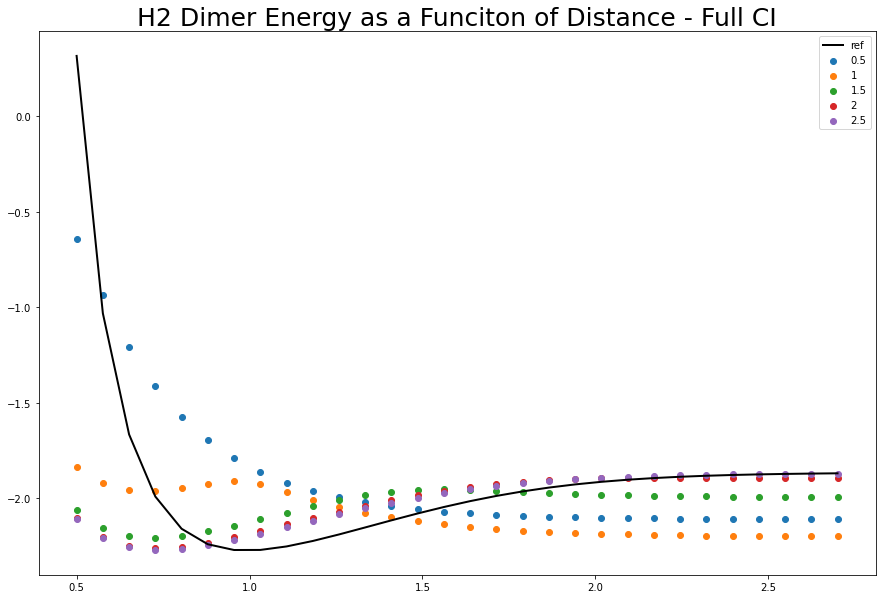

In [17]:

plt.figure(figsize=(15,10))


plt.title('H2 Dimer Energy as a Funciton of Distance - Full CI', fontsize=25)

plt.plot(bond_lengths , 2*FCI_PES, label="ref", lw=2, c='k')
for distance in fragments_fci.keys():
    plt.scatter(bond_lengths, fragments_fci[distance], label=distance)
    

    
plt.legend()
plt.show()


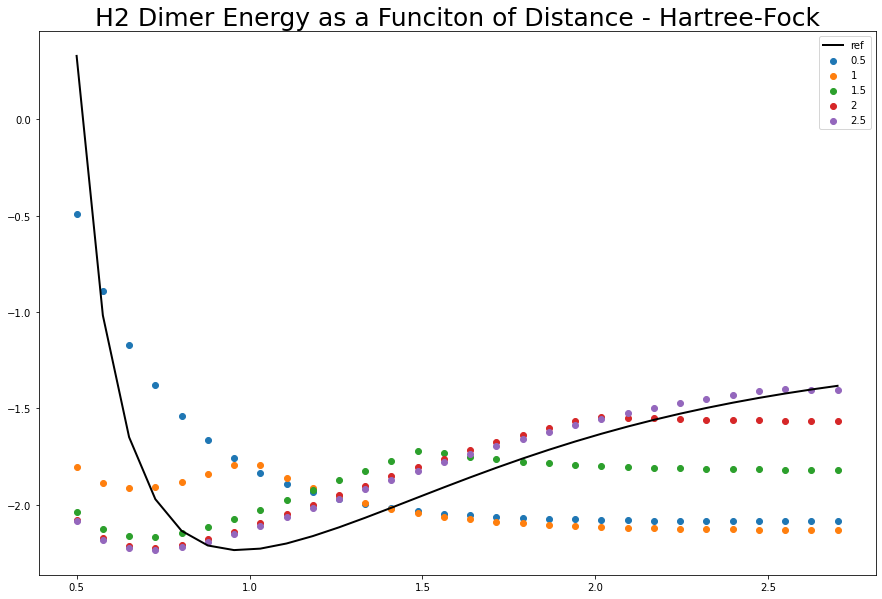

In [18]:

plt.figure(figsize=(15,10))

plt.title('H2 Dimer Energy as a Funciton of Distance - Hartree-Fock', fontsize=25)

plt.plot(bond_lengths , 2*HF_PES, label="ref", lw=2, c='k')
for distance in fragments_hf.keys():
    plt.scatter(bond_lengths, fragments_hf[distance], label=distance)
    

    
plt.legend()
plt.show()


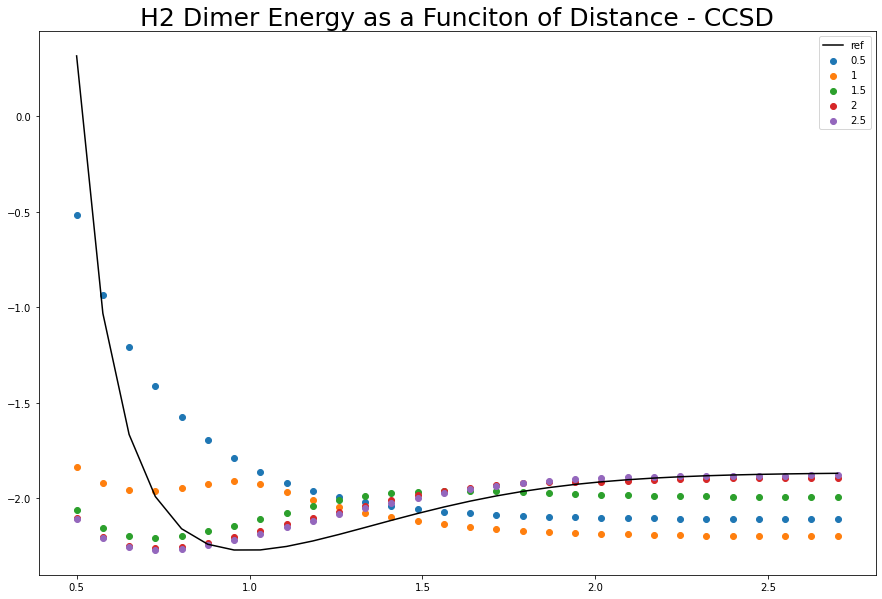

In [19]:

plt.figure(figsize=(15,10))

plt.title('H2 Dimer Energy as a Funciton of Distance - CCSD', fontsize=25)

plt.plot(bond_lengths , 2*CCSD_PES, label="ref", c='k')
for distance in fragments_ccsd.keys():
    plt.scatter(bond_lengths, fragments_ccsd[distance], label=distance)
    

    
plt.legend()
plt.show()


<br>
<br>
<br>
<br>
<br>

<font size='6' style="color:#00A6D6">  <b>3. Optional</b> </font>

<br>
<br>
<br>


# First Coordinate | Many-Body Effects


In [20]:

basis_sets = ["sto-3g", "cc-pvdz", "cc-pvtz", "cc-pvqz"]


In [21]:

#Run CCSD(T)
CCSD_T_PES = obtain_PES('h2', bond_lengths, basis, method='ccsd(t)')


converged SCF energy = -1.0429962745401
E = -1.0551598227014736 Eh
converged SCF energy = -1.09194672952787
E = -1.1063215786159268 Eh
converged SCF energy = -1.1132587056991
E = -1.130230598061663 Eh
converged SCF energy = -1.11727193818104
E = -1.1372603566661312 Eh
converged SCF energy = -1.11036248373524
E = -1.1338287645589176 Eh
converged SCF energy = -1.0965316610542
E = -1.1239908959854845 Eh
converged SCF energy = -1.0782891891832
E = -1.1103236186119652 Eh
converged SCF energy = -1.05722960490283
E = -1.0944957304401306 Eh
converged SCF energy = -1.03441354851726
E = -1.0776415556451864 Eh
converged SCF energy = -1.01059704596176
E = -1.0605802039409435 Eh
converged SCF energy = -0.986352190321705
E = -1.0439271444673965 Eh
converged SCF energy = -0.962124032112067
E = -1.0281436702913946 Eh
converged SCF energy = -0.938257867997994
E = -1.0135588550714747 Eh
converged SCF energy = -0.915016137781202
E = -1.0003835712927802 Eh
converged SCF energy = -0.892592531540238
E = -0.

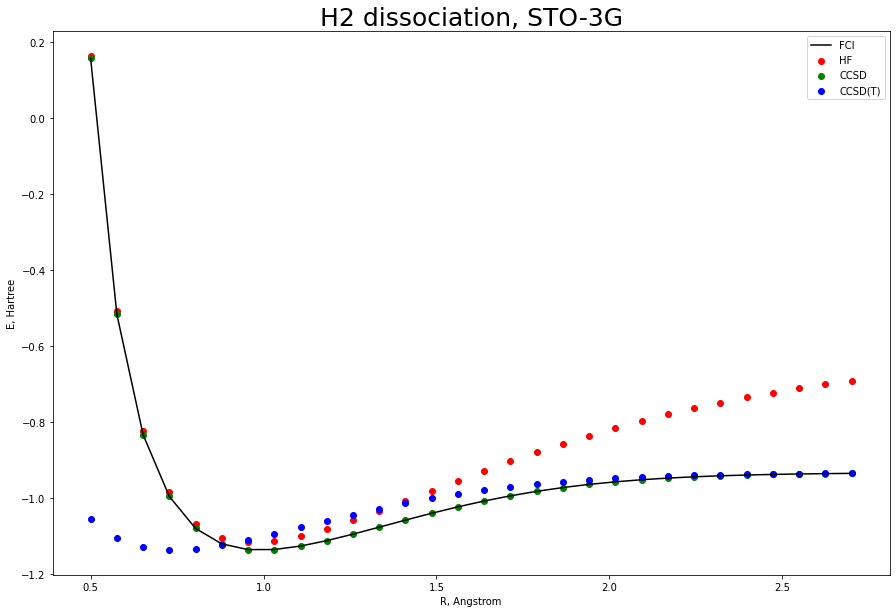

In [22]:
#Plot H2 PESs


plt.figure(figsize=(15,10))
plt.title('H2 dissociation, STO-3G', fontsize=25)
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI', c='k')
plt.scatter(bond_lengths, HF_PES, label='HF', color='r')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='g')
plt.scatter(bond_lengths, CCSD_T_PES, label='CCSD(T)', color='b')

plt.legend()

plt.show()



# First Coordinate | One-Electron Basis Size


In [23]:

basis_fci    = {basis: 0 for basis in basis_sets}
basis_hf     = {basis: 0 for basis in basis_sets}
basis_ccsd   = {basis: 0 for basis in basis_sets}
basis_ccsd_t = {basis: 0 for basis in basis_sets}


In [24]:

for basis in basis_fci.keys():
    basis_fci[basis] = obtain_PES('h2', bond_lengths, basis, method='fci')
    

converged SCF energy = -1.0429962745401
E = -1.0551597944706257 Eh
converged SCF energy = -1.09194672952787
E = -1.1063215216209508 Eh
converged SCF energy = -1.1132587056991
E = -1.130230486456294 Eh
converged SCF energy = -1.11727193818104
E = -1.1372602082146732 Eh
converged SCF energy = -1.11036248373524
E = -1.1338285565640789 Eh
converged SCF energy = -1.0965316610542
E = -1.1239908959821656 Eh
converged SCF energy = -1.0782891891832
E = -1.1103236186059828 Eh
converged SCF energy = -1.05722960490283
E = -1.0944957304219933 Eh
converged SCF energy = -1.03441354851726
E = -1.0776415555907983 Eh
converged SCF energy = -1.01059704596176
E = -1.0605802037879282 Eh
converged SCF energy = -0.986352190321705
E = -1.0439271444450942 Eh
converged SCF energy = -0.962124032112067
E = -1.0281436702440105 Eh
converged SCF energy = -0.938257867997994
E = -1.0135588549683625 Eh
converged SCF energy = -0.915016137781202
E = -1.0003835710893583 Eh
converged SCF energy = -0.892592531540238
E = -0.

In [25]:

for basis in basis_hf.keys():
    basis_hf[basis] = obtain_PES('h2', bond_lengths, basis, method='hf')


converged SCF energy = -1.0429962745401
E = -1.0429962745400954 Eh
converged SCF energy = -1.09194672952787
E = -1.091946729527871 Eh
converged SCF energy = -1.1132587056991
E = -1.1132587056990988 Eh
converged SCF energy = -1.11727193818104
E = -1.1172719381810448 Eh
converged SCF energy = -1.11036248373524
E = -1.1103624837352444 Eh
converged SCF energy = -1.0965316610542
E = -1.0965316610542022 Eh
converged SCF energy = -1.0782891891832
E = -1.0782891891831954 Eh
converged SCF energy = -1.05722960490283
E = -1.0572296049028314 Eh
converged SCF energy = -1.03441354851726
E = -1.0344135485172596 Eh
converged SCF energy = -1.01059704596176
E = -1.0105970459617604 Eh
converged SCF energy = -0.986352190321705
E = -0.9863521903217047 Eh
converged SCF energy = -0.962124032112067
E = -0.9621240321120674 Eh
converged SCF energy = -0.938257867997994
E = -0.9382578679979945 Eh
converged SCF energy = -0.915016137781202
E = -0.9150161377812018 Eh
converged SCF energy = -0.892592531540238
E = -0.

In [26]:

for basis in basis_ccsd.keys():
    basis_ccsd[basis] = obtain_PES('h2', bond_lengths, basis, method='ccsd')


converged SCF energy = -1.0429962745401
E = -1.0551598227014736 Eh
converged SCF energy = -1.09194672952787
E = -1.1063215786159268 Eh
converged SCF energy = -1.1132587056991
E = -1.130230598061663 Eh
converged SCF energy = -1.11727193818104
E = -1.1372603566661312 Eh
converged SCF energy = -1.11036248373524
E = -1.1338287645589176 Eh
converged SCF energy = -1.0965316610542
E = -1.1239908959854845 Eh
converged SCF energy = -1.0782891891832
E = -1.1103236186119652 Eh
converged SCF energy = -1.05722960490283
E = -1.0944957304401306 Eh
converged SCF energy = -1.03441354851726
E = -1.0776415556451864 Eh
converged SCF energy = -1.01059704596176
E = -1.0605802039409435 Eh
converged SCF energy = -0.986352190321705
E = -1.0439271444673965 Eh
converged SCF energy = -0.962124032112067
E = -1.0281436702913946 Eh
converged SCF energy = -0.938257867997994
E = -1.0135588550714747 Eh
converged SCF energy = -0.915016137781202
E = -1.0003835712927802 Eh
converged SCF energy = -0.892592531540238
E = -0.

In [ ]:

for basis in basis_ccsd_t.keys():
    basis_ccsd_t[basis] = obtain_PES('h2', bond_lengths, basis, method='ccsd(t)')


converged SCF energy = -1.0429962745401
E = -1.0551598227014736 Eh
converged SCF energy = -1.09194672952787
E = -1.1063215786159268 Eh
converged SCF energy = -1.1132587056991
E = -1.130230598061663 Eh
converged SCF energy = -1.11727193818104
E = -1.1372603566661312 Eh
converged SCF energy = -1.11036248373524
E = -1.1338287645589176 Eh
converged SCF energy = -1.0965316610542
E = -1.1239908959854845 Eh
converged SCF energy = -1.0782891891832
E = -1.1103236186119652 Eh
converged SCF energy = -1.05722960490283
E = -1.0944957304401306 Eh
converged SCF energy = -1.03441354851726
E = -1.0776415556451864 Eh
converged SCF energy = -1.01059704596176
E = -1.0605802039409435 Eh
converged SCF energy = -0.986352190321705
E = -1.0439271444673965 Eh
converged SCF energy = -0.962124032112067
E = -1.0281436702913946 Eh
converged SCF energy = -0.938257867997994
E = -1.0135588550714747 Eh
converged SCF energy = -0.915016137781202
E = -1.0003835712927802 Eh
converged SCF energy = -0.892592531540238
E = -0.

In [ ]:
# Plots in the next PR! 